### Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import os
import re
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import warnings
# warnings.filterwarnings("ignore",DeprecationWarning)
warnings.simplefilter("ignore",DeprecationWarning)

&nbsp;

### Sample Text

In [2]:
sample_text = ['Play football on holiday',
               'Bmw is super car',
               'Football is awesome game',
               'Bmw is costly car',
               'Football is good excercise',
               'Bmw is big brand']
sample_text_df = pd.DataFrame({'text':sample_text})
sample_text_df

,text
0,Play football on holiday
1,Bmw is super car
2,Football is awesome game
3,Bmw is costly car
4,Football is good excercise
5,Bmw is big brand


&nbsp;

### Data Cleaning

In [3]:
sample_text_df['text'] = sample_text_df['text'].map(lambda x: re.sub('[,\.!?]','',x))
sample_text_df['text'] = sample_text_df['text'].map(lambda x: x.lower())
sample_text_df

,text
0,play football on holiday
1,bmw is super car
2,football is awesome game
3,bmw is costly car
4,football is good excercise
5,bmw is big brand


&nbsp;

### Exploratory Data Analysis

play football on holiday,bmw is super car,football is awesome game,bmw is costly car,football is good excercise,bmw is big brand 



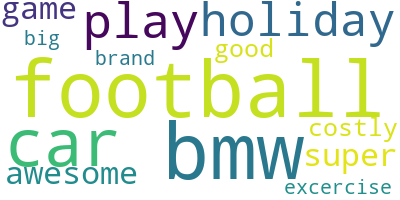

In [4]:
#Making a single long string
long_string = ",".join(list(sample_text_df['text']))
print(long_string,"\n")

#Creating wordcloud object
wordcloud = WordCloud(background_color='white', max_words=500, contour_width=3, contour_color='blue')

#Generate Wordcloud
wordcloud.generate(long_string)

#Visualize wordcloud
wordcloud.to_image()

&nbsp;

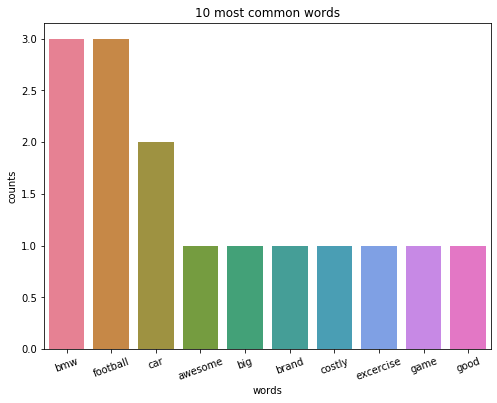

In [5]:
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    print(count_dict)
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    #print(count_dict)
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(8, 6))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=20) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()### Prepare Text Data LDA Analysis

#Initialize the count vectorier with English Stop Words
count_vectorizer = CountVectorizer(stop_words="english")

#Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(sample_text)
#print(count_data)

#Visualize the 10 common words
plot_10_most_common_words(count_data, count_vectorizer)

In [6]:
print(count_vectorizer.get_feature_names())
for t in count_data:
    print(t.toarray()[0])

['awesome', 'big', 'bmw', 'brand', 'car', 'costly', 'excercise', 'football', 'game', 'good', 'holiday', 'play', 'super']
[0 0 0 0 0 0 0 1 0 0 1 1 0]
[0 0 1 0 1 0 0 0 0 0 0 0 1]
[1 0 0 0 0 0 0 1 1 0 0 0 0]
[0 0 1 0 1 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 1 0 1 0 0 0]
[0 1 1 1 0 0 0 0 0 0 0 0 0]


### Key Point:
* From above we can see and cross check that, get_feature_names() are word columns.
* And count_data has word count matrix for whole data(i.e.,documents/rows) 

&nbsp;

### Model Fit

In [7]:
number_topics = 2

#Create and fit the LDA model
lda = LatentDirichletAllocation(n_components=number_topics,
                                doc_topic_prior=0.9, topic_word_prior=0.3,
                                n_jobs=-1,random_state=101)
lda.fit(count_data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=0.9,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=2, n_jobs=-1,
                          perp_tol=0.1, random_state=101, topic_word_prior=0.3,
                          total_samples=1000000.0, verbose=0)

&nbsp;

### Printing the Topics

In [8]:
#Number of words per each topic
number_words = 5

def print_topics(model,count_vectorizer,n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx,topic in enumerate(model.components_):
        print("\n Topic #%d:" % topic_idx)
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
        
#Print the topics founded by the LDA model
print("Topics found via LDA:")
print_topics(lda,count_vectorizer,number_words)

Topics found via LDA:

 Topic #0:
bmw car costly super big

 Topic #1:
football good excercise holiday play


### Key Note:
* We can see LDA model has perfectly clustered given documents into two topics.
* So by seeing two topics, we can say that, Topic-1 is about "Footbal" and Topic-2 is about "BMW Car".
* We can see after making hyperparameters value these:- doc_topic_prior(alpha)=0.9(means each document contains mostly single topic), topic_word_prior(beta)=0.3(means each topic contains more words).
* As our each sentence contains one topic and each topic has more words from that sentence, our selected hyperparmeters favoured us proper topic generation.
* But in other data we may tune hyperparameters(doc_topic_prior(alpha), topic_word_prior(beta)) accordingly, like if single sentence/document has more than one topic.

&nbsp;

### <span style='background:yellow'>LDA Manual Calculation</span>

#### Randomly assigned topics(0,1) to sample data

In [9]:
#Above countvectorizer removed stop words LDA, so we also removing it.
['Play(0) football(1) holiday(1)',
 'Bmw(1) super(0) car(1)',
 'Football(1) awesome(1) game(0)',
 'Bmw(0) costly(1) car(1)',
 'Football(1) good(0) excercise(0)',
 'Bmw(0) big(0) brand(1)']

['Play(0) football(1) holiday(1)',
 'Bmw(1) super(0) car(1)',
 'Football(1) awesome(1) game(0)',
 'Bmw(0) costly(1) car(1)',
 'Football(1) good(0) excercise(0)',
 'Bmw(0) big(0) brand(1)']

In [10]:
df_documents = pd.DataFrame({'text':['play football holiday',
                                     'bmw super car',
                                     'football awesome game',
                                     'bmw costly car',
                                     'football good excercise',
                                     'bmw big brand']})
df_documents

,text
0,play football holiday
1,bmw super car
2,football awesome game
3,bmw costly car
4,football good excercise
5,bmw big brand


In [52]:
documents = []
for i in range(len(df_documents['text'].tolist())):
    for j in range(len(df_documents['text'].tolist()[i].split())):
        documents.append(i)
words = " ".join(list(df_documents['text'].tolist())).split()
intial_topic_assigned = [0,1,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,1]
updated_topic_assigned = [0,1,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,1]

lda_result = pd.DataFrame({'documents':documents,
                         'words':words,
                         'intial_topic_assigned':intial_topic_assigned,
                         'updated_topic_assigned':updated_topic_assigned
                          })
lda_result

,documents,words,intial_topic_assigned,updated_topic_assigned
0,0,play,0,0
1,0,football,1,1
2,0,holiday,1,1
3,1,bmw,1,1
4,1,super,0,0
5,1,car,1,1
6,2,football,1,1
7,2,awesome,1,1
8,2,game,0,0
9,3,bmw,0,0


In [47]:
word_topic_matrix = pd.DataFrame({'unique_words':['awesome', 'big', 'bmw', 'brand', 'car', 'costly', 'excercise', 'football', 'game', 'good', 'holiday', 'play', 'super'],
                                  'topic_0_count':[0,1,2,0,0,0,1,0,1,1,0,1,1],
                                  'topic_1_count':[1,0,1,1,2,1,0,3,0,0,1,0,0]})
word_topic_matrix

,unique_words,topic_0_count,topic_1_count
0,awesome,0,1
1,big,1,0
2,bmw,2,1
3,brand,0,1
4,car,0,2
5,costly,0,1
6,excercise,1,0
7,football,0,3
8,game,1,0
9,good,1,0


In [48]:
doc_topic_matrix = pd.DataFrame({'document':[1,2,3,4,5,6],
                                  'topic_0_count':[1,1,1,1,2,2],
                                  'topic_1_count':[2,2,2,2,1,1]})
doc_topic_matrix

,document,topic_0_count,topic_1_count
0,1,1,2
1,2,1,2
2,3,1,2
3,4,1,2
4,5,2,1
5,6,2,1


### Key Points:
* alpha = 0.9(means assuming more topics exist in each document)
* beta = 0.3(assuming less words assigned to each topic)
* Total unique  topics = 2
* Total unique words = 13

In [53]:
prob_word_topic_0 = 0 
prob_word_topic_1 = 0
iteration = 2
words = " ".join(list(df_documents['text'].tolist())).split()
# print(words)
# ['play', 'football', 'holiday', 'bmw', 'super', 'car', 'football', 'awesome', 'game', 'bmw', 'costly',
# 'car', 'football', 'good', 'excercise', 'bmw', 'big', 'brand']

for k in range(iteration):
    #print('iteration--->',k)
    #print('-------------------')
    row_index = 0
    documents = 6
    prob_word_topic_0_results = []
    prob_word_topic_1_results = []
    iteration_results = []
    lda_result['iteration_'+str(k)+'_topic_0_prob'] = ''
    lda_result['iteration_'+str(k)+'_topic_1_prob'] = ''
    lda_result['iteration_'+str(k)+'_topic'] = ''
    for i in range(documents):
        total_unique_words = len(word_topic_matrix)
        unique_topics = 2
        total_count_topic_0 = lda_result[lda_result['updated_topic_assigned']==0]['updated_topic_assigned'].count()#8
        total_count_topic_1 = lda_result[lda_result['updated_topic_assigned']==1]['updated_topic_assigned'].count()#10
        doc_topic_0_count = lda_result[(lda_result['documents']==i) & (lda_result['updated_topic_assigned']==0)]['updated_topic_assigned'].count()
        doc_topic_1_count = lda_result[(lda_result['documents']==i) & (lda_result['updated_topic_assigned']==1)]['updated_topic_assigned'].count()
        doc_word_len = len(df_documents.iloc[i,:][0].split())

        for j in range(doc_word_len):
            word_topic_0_count = lda_result[(lda_result['words']==words[row_index]) & (lda_result['updated_topic_assigned']==0)]['updated_topic_assigned'].count()
            word_topic_1_count = lda_result[(lda_result['words']==words[row_index]) & (lda_result['updated_topic_assigned']==1)]['updated_topic_assigned'].count()
            
            #print(words[row_index])
            #print('word_topic_0_count-->',word_topic_0_count)
            #print('word_topic_1_count-->',word_topic_1_count)
            #print('doc_topic_0_count-->',doc_topic_0_count)
            #print('doc_topic_1_count-->',doc_topic_1_count)
            #print('total_count_topic_0-->',total_count_topic_0)
            #print('total_count_topic_1-->',total_count_topic_1)
            prob_word_topic_0 = (((word_topic_0_count+0.3)/(total_count_topic_0+(total_unique_words*0.3)))*((doc_topic_0_count+0.9)/((doc_topic_0_count+doc_topic_1_count)*(unique_topics*0.9))))
            prob_word_topic_1 = (((word_topic_1_count+0.3)/(total_count_topic_1+(total_unique_words*0.3)))*((doc_topic_1_count+0.9)/((doc_topic_0_count+doc_topic_1_count)*(unique_topics*0.9))))
            
            prob_word_topic_0_results.append(prob_word_topic_0)
            prob_word_topic_1_results.append(prob_word_topic_1)
            
            if (prob_word_topic_0 > prob_word_topic_1) == True:
                iteration_results.append(0)
            else:
                iteration_results.append(1)
            row_index+=1
    lda_result['iteration_'+str(k)+'_topic_0_prob'] = prob_word_topic_0_results
    lda_result['iteration_'+str(k)+'_topic_1_prob'] = prob_word_topic_1_results
    lda_result['iteration_'+str(k)+'_topic'] = iteration_results
    lda_result['updated_topic_assigned'] = iteration_results
        
lda_result

,documents,words,intial_topic_assigned,updated_topic_assigned,iteration_0_topic_0_prob,iteration_0_topic_1_prob,iteration_0_topic,iteration_1_topic_0_prob,iteration_1_topic_1_prob,iteration_1_topic
0,0,play,0,0,0.038438,0.011591,0,0.035458,0.012489,0
1,0,football,1,1,0.008870,0.127498,1,0.008183,0.137382,1
2,0,holiday,1,1,0.008870,0.050226,1,0.008183,0.054120,1
3,1,bmw,1,0,0.068005,0.050226,0,0.137382,0.008183,0
4,1,super,0,0,0.038438,0.011591,0,0.054120,0.008183,0
5,1,car,1,1,0.008870,0.088862,1,0.012489,0.062733,1
6,2,football,1,1,0.008870,0.127498,1,0.008183,0.137382,1
7,2,awesome,1,1,0.008870,0.050226,1,0.008183,0.054120,1
8,2,game,0,0,0.038438,0.011591,0,0.035458,0.012489,0
9,3,bmw,0,0,0.068005,0.050226,0,0.090009,0.012489,0


### Key point
* The algorithm also had other hyperparameters to change for weightages on words with high counts and each document with most major count topics, to get proper assignment of topics.
* LatentDirichletAllocation(batch_size=128, doc_topic_prior=0.9,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=2, n_jobs=-1,
                          perp_tol=0.1, random_state=101, topic_word_prior=0.3,
                          total_samples=1000000.0, verbose=0)
* Only with two hyperparameters i'm unable to get proper topic assignment(because in above after iteration 2 the probabilities not changing further), but model able to do it with all hyperparameters.
* So need to do more analysis to know how exactly to use hyperparameters to get assignment of topics properly in manual calculation.